## Importing

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')  

## Data Loading and Expolartion

In [136]:
DATA_PATH = 'weather_classification_data.csv'

In [137]:
df = pd.read_csv(DATA_PATH)

In [138]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [140]:
df.duplicated().sum()

0

In [141]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [142]:
df['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [143]:
df['Season'].value_counts()

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [144]:
df['Location'].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

In [145]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

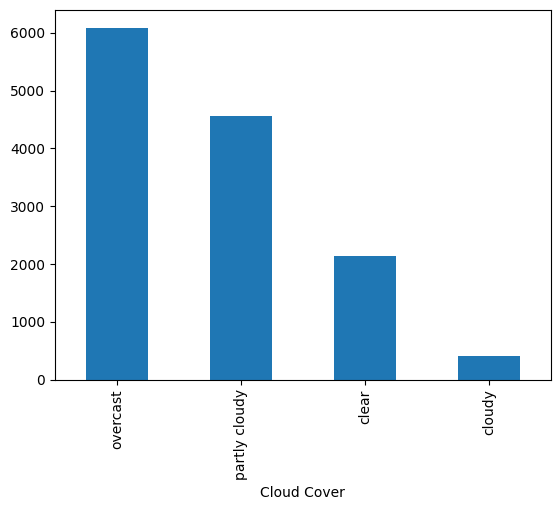

In [146]:
df['Cloud Cover'].value_counts().plot(kind='bar')
plt.show()

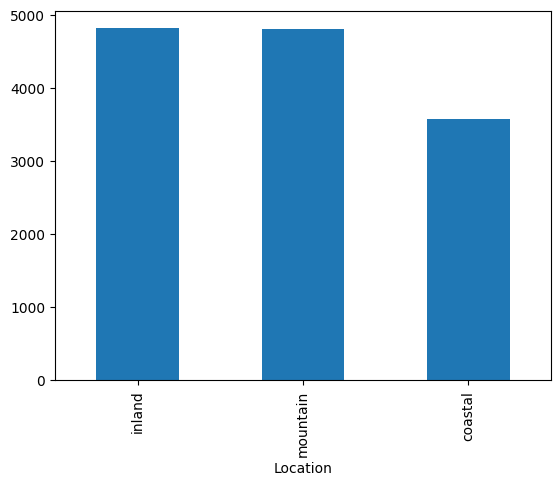

In [147]:
df['Location'].value_counts().plot(kind='bar')
plt.show()

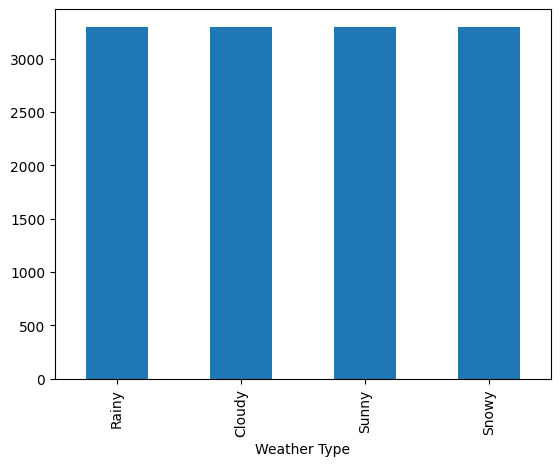

In [148]:
df['Weather Type'].value_counts().plot(kind='bar')
plt.show()

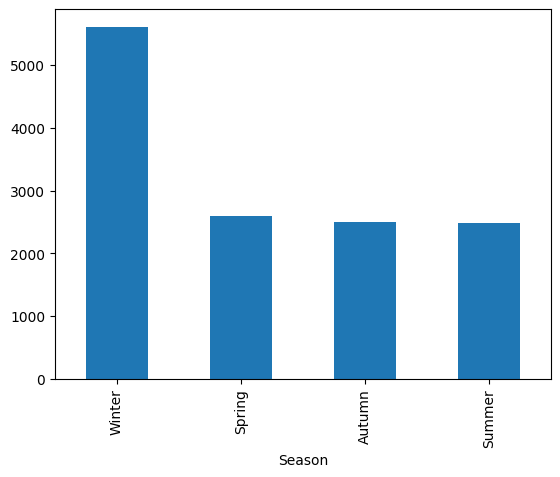

In [149]:
df['Season'].value_counts().plot(kind='bar')
plt.show()

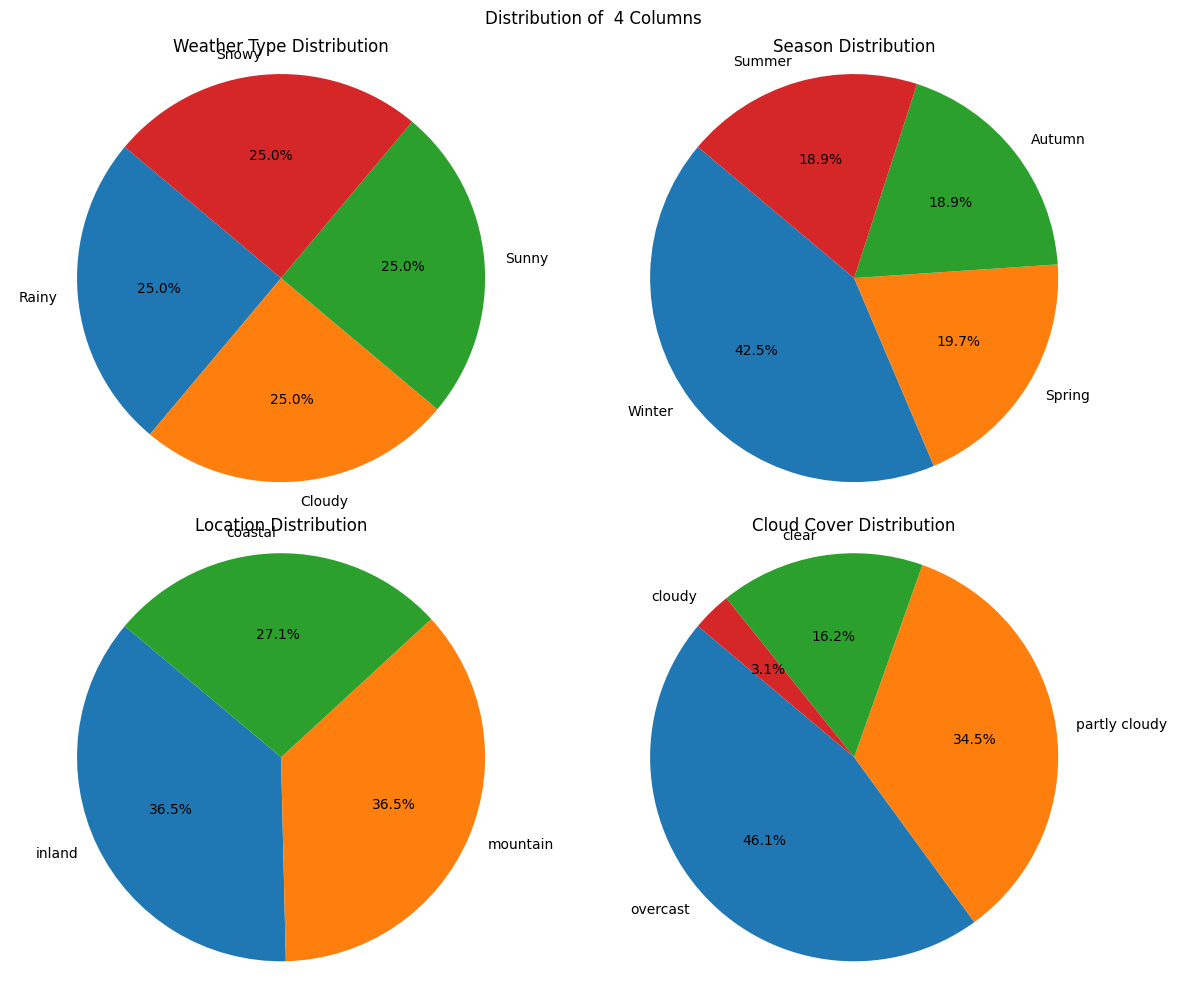

In [150]:
top_columns = ['Weather Type', 'Season', 'Location', 'Cloud Cover']


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of  4 Columns')

for i, column in enumerate(top_columns):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    
    counts = df[column].value_counts()
    
    
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{column} Distribution')
    ax.axis('equal')  

plt.tight_layout()
plt.show()

## Data Cleaning and Preprocessing

In [96]:
cat_columns = ['Weather Type', 'Season', 'Location', 'Cloud Cover']

In [98]:
le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])
   

In [99]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,1
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,2
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,2


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int32  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int32  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int32  
 10  Weather Type          13200 non-null  int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 928.2 KB


In [101]:
import seaborn as sns

<Axes: >

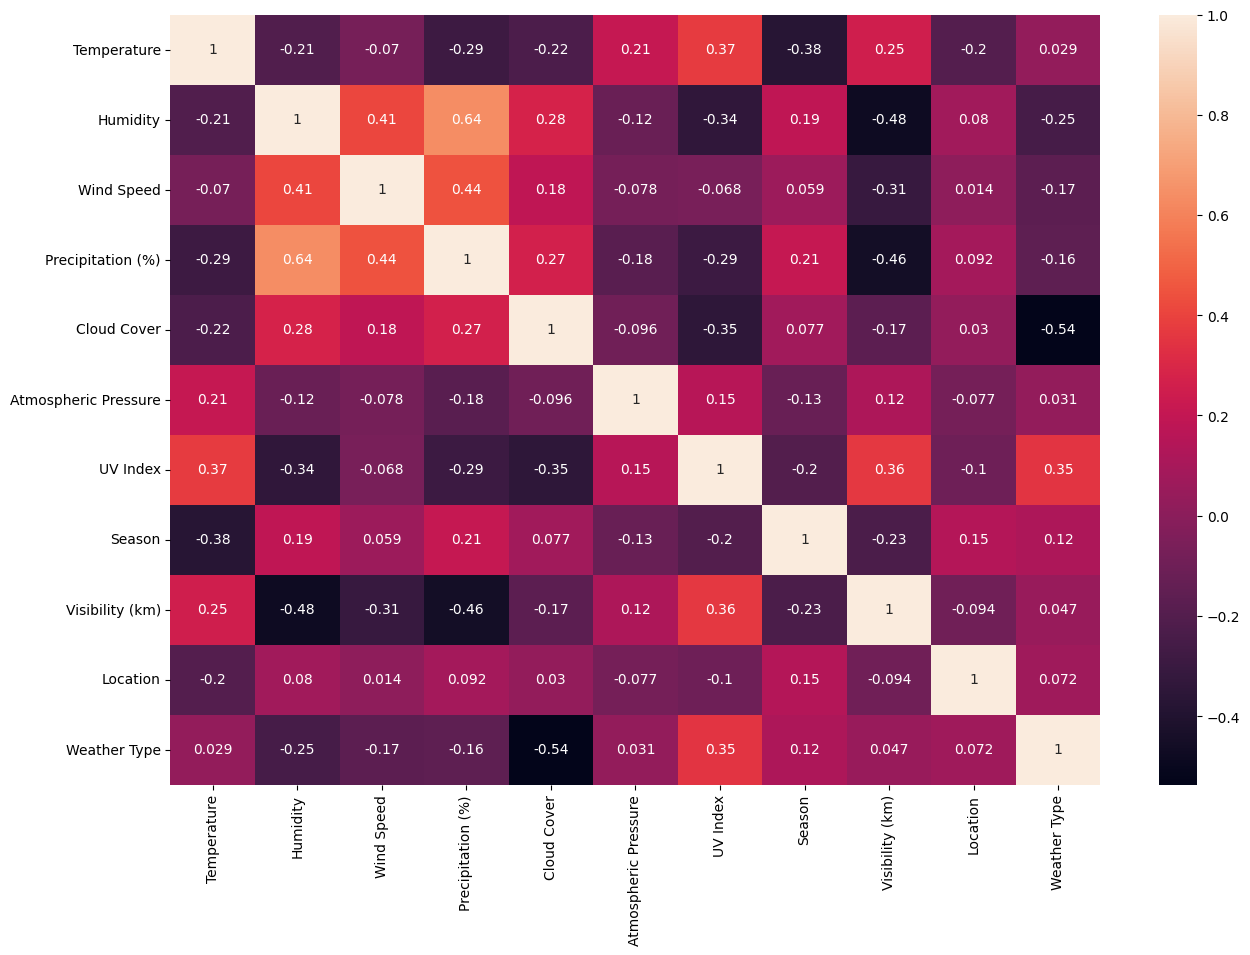

In [102]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

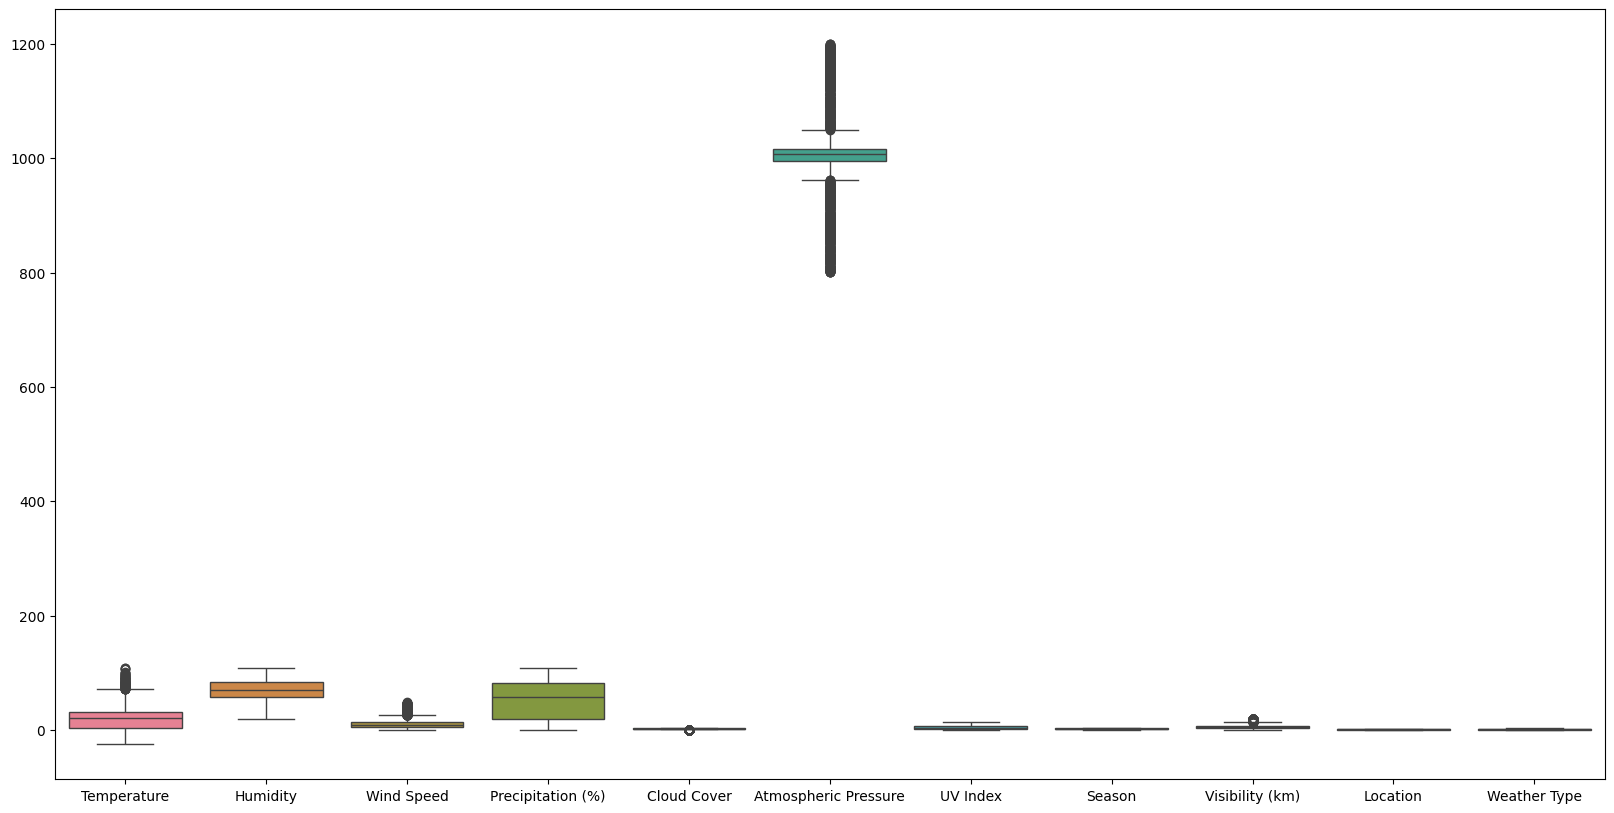

In [103]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

In [132]:
def remove_outliers(df, z_threshold=3):
    df_no_outliers = df.copy()
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    for col in numerical_cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df_no_outliers = df_no_outliers[z_scores <= z_threshold]
    
    return df_no_outliers


df = remove_outliers(df)

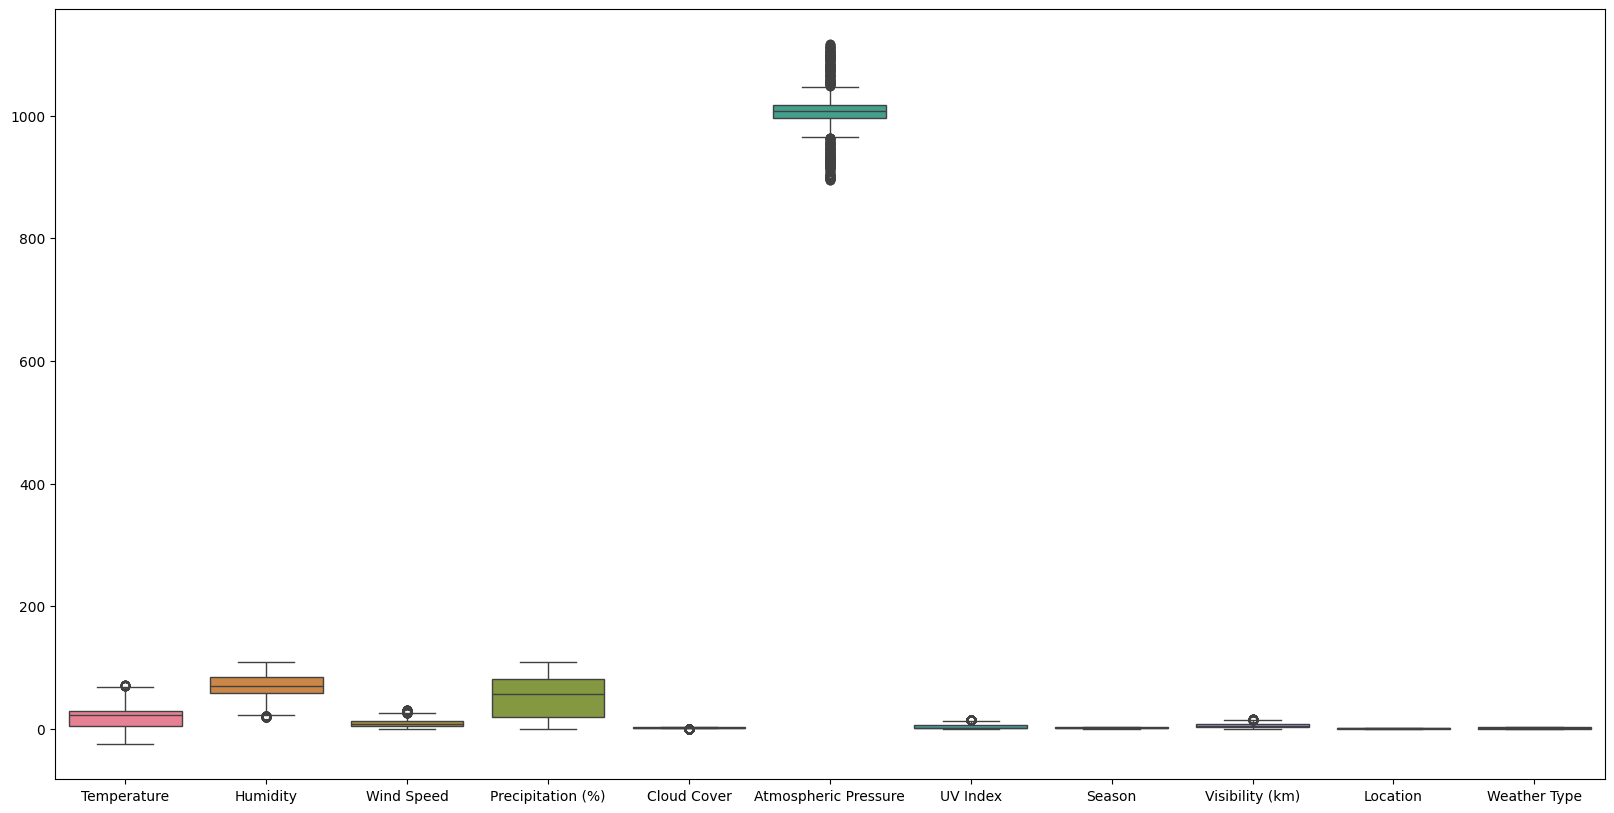

In [105]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

## Data modeling and Evaluation

In [106]:
X = df.drop(columns='Weather Type')
y = df['Weather Type']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [109]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
}

In [110]:
pipelines = {}
for clf_name, clf in classifiers.items():
    
    pipelines[clf_name] = make_pipeline(
        StandardScaler(),  
        clf                
    )

    

Decision Tree:
Accuracy = 0.9451453647833242
Precision = 0.9452521546884548
Recall = 0.9451453647833242
F1-score = 0.9451768141454077
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       951
           1       0.92      0.94      0.93       894
           2       0.97      0.97      0.97       920
           3       0.96      0.95      0.95       881

    accuracy                           0.95      3646
   macro avg       0.95      0.95      0.95      3646
weighted avg       0.95      0.95      0.95      3646



Random Forest:
Accuracy = 0.9561162918266594
Precision = 0.9564674994298114
Recall = 0.9561162918266594
F1-score = 0.9562101226167303
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       951
           1       0.94      0.95      0.95       894
           2       0.98      0.97      0.97       920
           3       0.97      0.95      0.96       881

    accuracy           

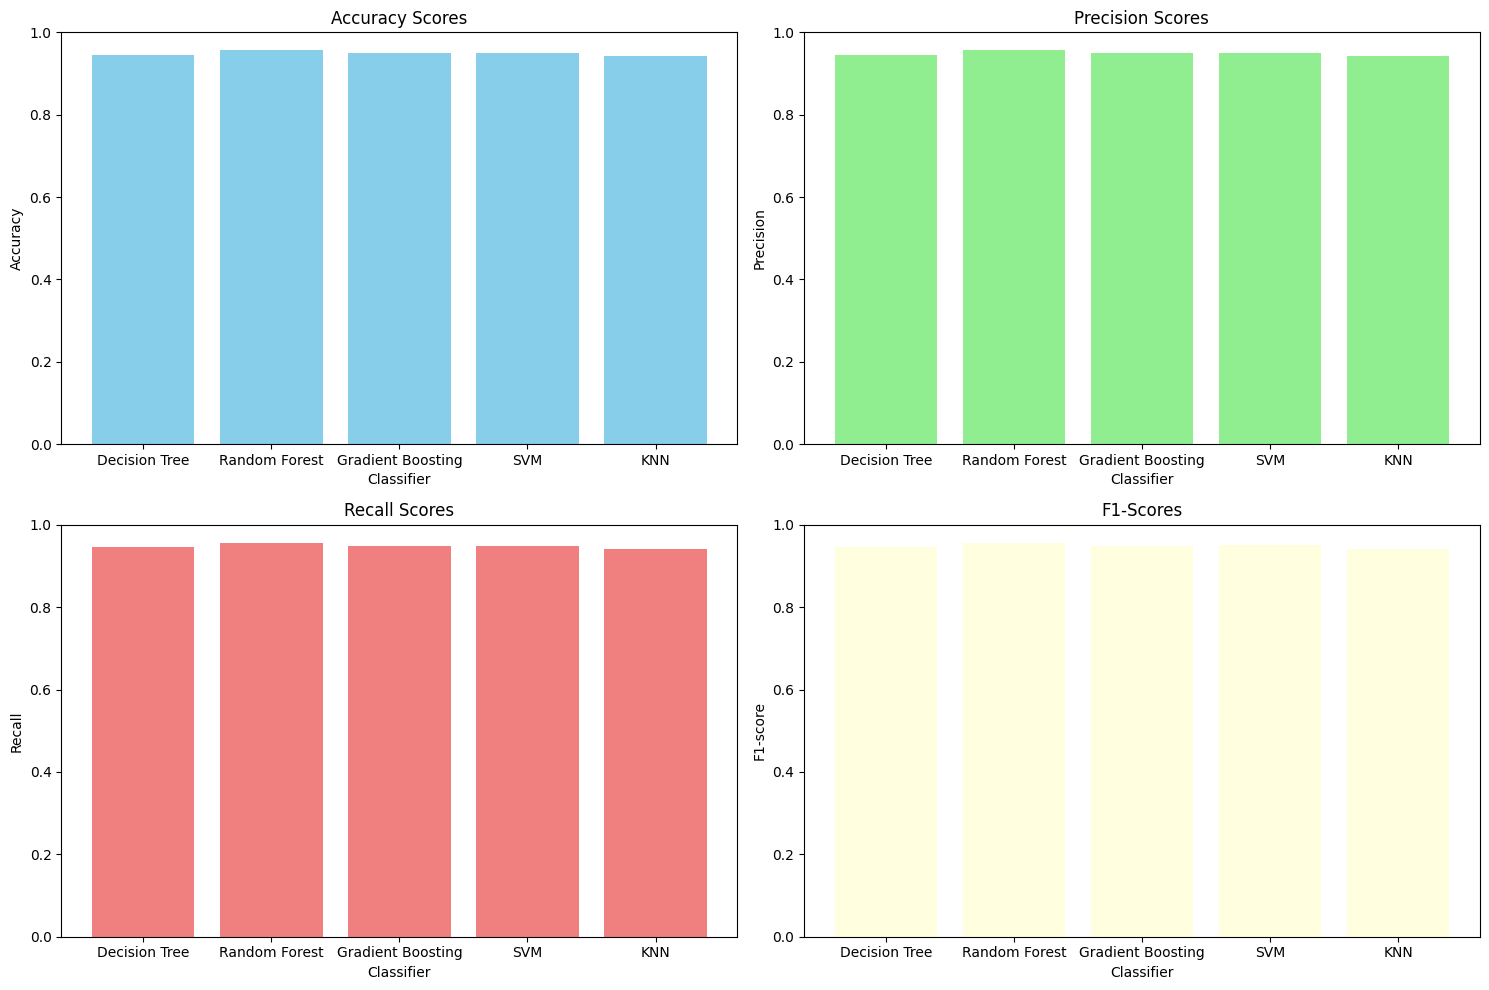

In [128]:
clf_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for clf_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    
    clf_names.append(clf_name)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    
    precision = precision_score(y_test, y_pred, average='weighted')  
    recall = recall_score(y_test, y_pred, average='weighted') 
    f1 = f1_score(y_test, y_pred, average='weighted')  
    
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    
    print(f'{clf_name}:')
    print(f'Accuracy = {accuracy}')
    print(f'Precision = {precision}')
    print(f'Recall = {recall}')
    print(f'F1-score = {f1}')
    print(classification_report(y_test, y_pred))
    print('\n')


fig, axs = plt.subplots(2, 2, figsize=(15, 10))


axs[0, 0].bar(clf_names, accuracy_scores, color='skyblue')
axs[0, 0].set_title('Accuracy Scores')
axs[0, 0].set_xlabel('Classifier')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim([0, 1])  


axs[0, 1].bar(clf_names, precision_scores, color='lightgreen')
axs[0, 1].set_title('Precision Scores')
axs[0, 1].set_xlabel('Classifier')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim([0, 1])  


axs[1, 0].bar(clf_names, recall_scores, color='lightcoral')
axs[1, 0].set_title('Recall Scores')
axs[1, 0].set_xlabel('Classifier')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim([0, 1])  


axs[1, 1].bar(clf_names, f1_scores, color='lightyellow')
axs[1, 1].set_title('F1-Scores')
axs[1, 1].set_xlabel('Classifier')
axs[1, 1].set_ylabel('F1-score')
axs[1, 1].set_ylim([0, 1])  


plt.tight_layout()
plt.show()


## Feature Importance

In [124]:
rf_classifier = RandomForestClassifier(random_state=42)


rf_classifier.fit(X_train, y_train)


importance = rf_classifier.feature_importances_
feature_names = X.columns


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("Feature Importance (Random Forest):")
feature_importance_df

Feature Importance (Random Forest):


,Feature,Importance
0,Temperature,0.226975
8,Visibility (km),0.153366
3,Precipitation (%),0.153344
6,UV Index,0.144718
4,Cloud Cover,0.098522
5,Atmospheric Pressure,0.091028
1,Humidity,0.050694
7,Season,0.047484
2,Wind Speed,0.022784
9,Location,0.011084


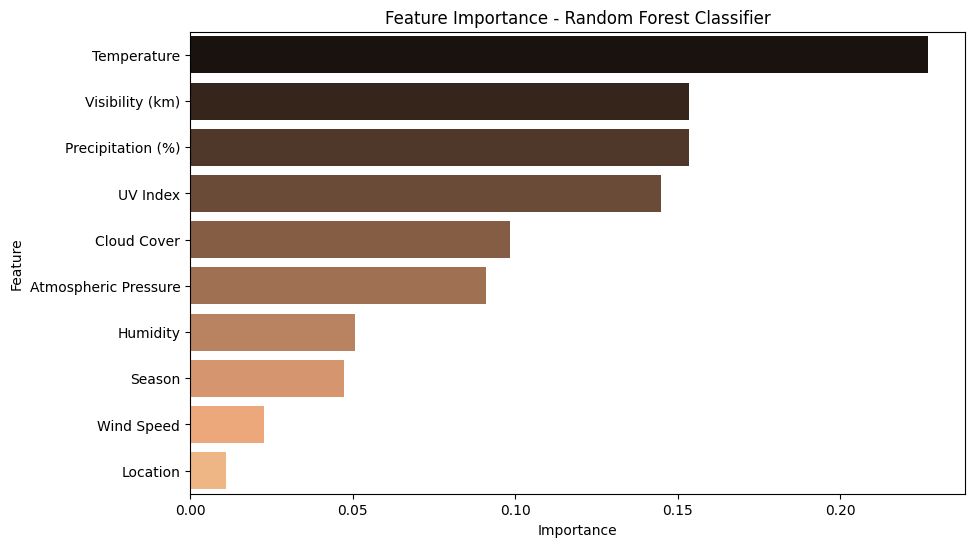

In [125]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='copper')
plt.title('Feature Importance - Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()